In [288]:
library(ggplot2)
library(nnet)

# load data
data(iris)
X <- iris[, 1:4]
Y <- iris[, 5]


In [289]:
# plot the decision boundary

plot_decision_regions <- function(model, data) {
  var <- all.vars(formula(model))
  input <- var[-1]

  stopifnot(length(input) == 2)
  output <- var[1]
  # make a grid of points
  x <- seq(min(data[[input[1]]]), max(data[[input[1]]]), length.out = 100)
  y <- seq(min(data[[input[2]]]), max(data[[input[2]]]), length.out = 100)
  grid <- expand.grid(x, y)
  grid <- setNames(grid, input)


  # predict the values
  grid[[output]] <- as.factor(predict(model, grid))
  # plot the decision boundary
  ggplot() +
    geom_point(data = data, aes(x = .data[[input[1]]], y = .data[[input[2]]], color = .data[[output]]), size = 3) +
    geom_tile(data = grid, aes(x = .data[[input[1]]], y = .data[[input[2]]], fill = .data[[output]]), alpha = 0.5) +
    scale_fill_manual(values = c("setosa" = "#914fbd", "versicolor" = "#92c0c6", "virginica" = "#ebf08b")) +
    scale_color_manual(values = c("setosa" = "#440154", "versicolor" = "#2bacd3", "virginica" = "#ebd93e")) +
    theme_minimal() +
    labs(
      title = "Decision Boundaries for Multiclass Logistic Regression",
      subtitle = sprintf("%s Dataset", deparse(substitute(data))),
      x = input[1],
      y = input[2],
    )
}


## Logistic Regression model

In [290]:
# model based on thw first two features of the iris dataset
model <- multinom(Species ~ Sepal.Length + Sepal.Width, data = iris)
predictions <- predict(model, iris)

# number of misclassified samples
sprintf("Misclassified: %d", sum(predictions != iris$Species))

# accuracy
sprintf("Accuracy: %.2f", sum(predictions == iris$Species) / nrow(iris))


# weights:  12 (6 variable)
initial  value 164.791843 
iter  10 value 62.715967
iter  20 value 59.808291
iter  30 value 55.445984
iter  40 value 55.375704
iter  50 value 55.346472
iter  60 value 55.301707
iter  70 value 55.253532
iter  80 value 55.243230
iter  90 value 55.230241
iter 100 value 55.212479
final  value 55.212479 
stopped after 100 iterations


[1] "Misclassified: 25"

[1] "Accuracy: 0.83"

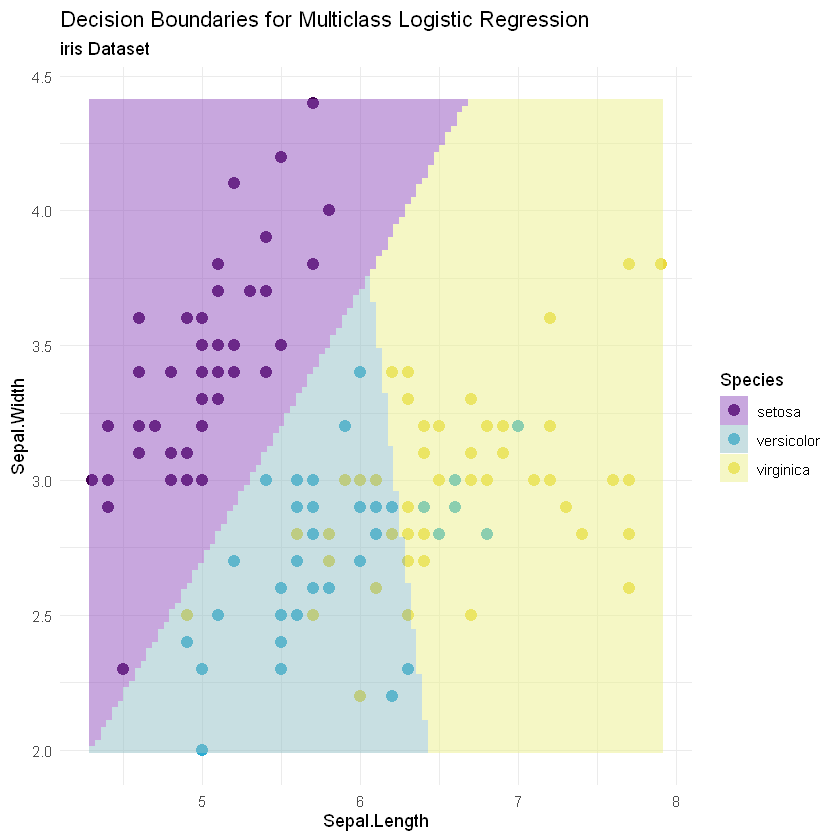

In [291]:
plot_decision_regions(model, iris)

## Observaciones

Como podemos observar del código
```python
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[: , :2]
Y = iris.target
```
Se usan las primeras dos características para construir el clasificador, esto para poder visualizar las regiones $R_i$ del clasificador.

Sin embargo, escoger estas dos características me parecía un poco arbitrario.
Asi que busque otras dos, y también considere todas las características.

## con Petal.Length y Petal.Width

La precision del clasificador es 0.96.

In [292]:
# model based on thw first two features of the iris dataset
model <- multinom(Species ~ Petal.Length + Petal.Width, data = iris)
predictions <- predict(model, iris)

# number of misclassified samples
sprintf("Misclassified: %d", sum(predictions != iris$Species))

# accuracy
sprintf("Accuracy: %.2f", sum(predictions == iris$Species) / nrow(iris))


# weights:  12 (6 variable)
initial  value 164.791843 
iter  10 value 12.657828
iter  20 value 10.374056
iter  30 value 10.330881
iter  40 value 10.306926
iter  50 value 10.300057
iter  60 value 10.296452
iter  70 value 10.294046
iter  80 value 10.292029
iter  90 value 10.291154
iter 100 value 10.289505
final  value 10.289505 
stopped after 100 iterations


[1] "Misclassified: 6"

[1] "Accuracy: 0.96"

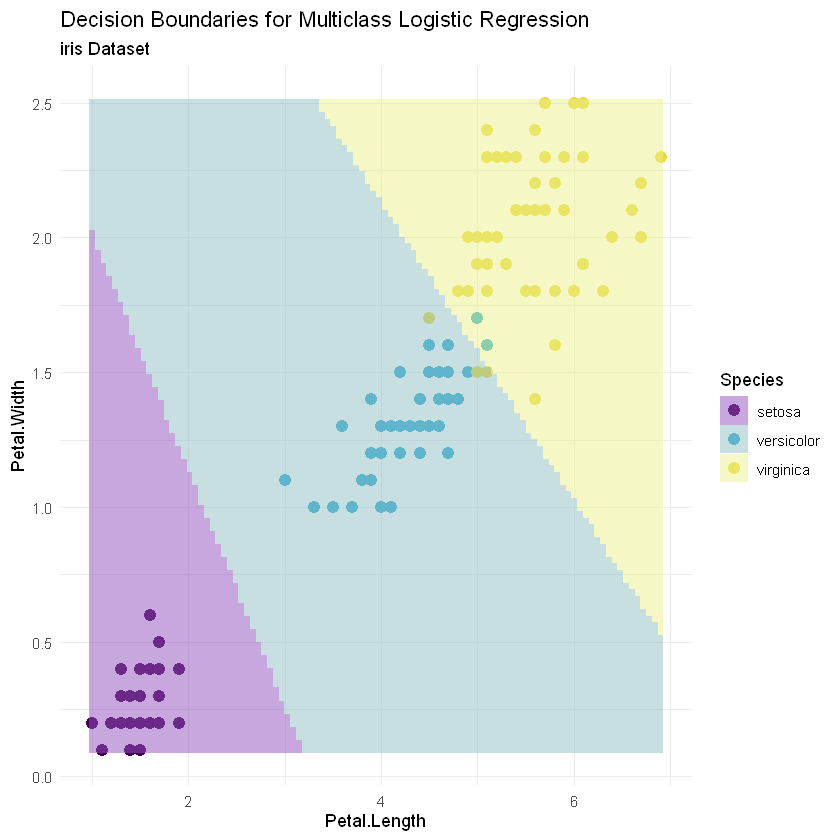

In [293]:
plot_decision_regions(model, iris)

## Todas las características

La precisión del clasificador es 0.99

In [294]:
model <- multinom(Species ~ ., data = iris)
predictions <- predict(model, iris)

# number of misclassified samples
sprintf("Misclassified: %d", sum(predictions != iris$Species))

# accuracy
sprintf("Accuracy: %.2f", sum(predictions == iris$Species) / nrow(iris))


# weights:  18 (10 variable)
initial  value 164.791843 
iter  10 value 16.177348
iter  20 value 7.111438
iter  30 value 6.182999
iter  40 value 5.984028
iter  50 value 5.961278
iter  60 value 5.954900
iter  70 value 5.951851
iter  80 value 5.950343
iter  90 value 5.949904
iter 100 value 5.949867
final  value 5.949867 
stopped after 100 iterations


[1] "Misclassified: 2"

[1] "Accuracy: 0.99"

Y en mi búsqueda por un clasificador logístico en `R`, me encontré con que un clasificador lineal también funciona bien.

In [295]:
model <- glm(as.numeric(Species) ~ Sepal.Length + Sepal.Width, data = iris)
# misclassified
misclas <- sum(round(predict(model)) != as.numeric(iris$Species))
sprintf("Misclassified: %d", misclas)
# accuracy
sprintf("Accuracy: %f", 1 - misclas / nrow(iris))


[1] "Misclassified: 37"

[1] "Accuracy: 0.753333"

In [296]:
model <- glm(as.numeric(Species) ~ Petal.Length + Petal.Width, data = iris)

# misclassified
misclas <- sum(round(predict(model)) != as.numeric(iris$Species))
sprintf("Misclassified: %d", misclas)

# acuracy
sprintf("Accuracy: %f", 1 - misclas / nrow(iris))


[1] "Misclassified: 6"

[1] "Accuracy: 0.960000"

In [297]:
model <- glm(as.numeric(Species) ~ ., data = iris)

# misclassified
misclas <- sum(round(predict(model)) != as.numeric(iris$Species))
sprintf("Misclassified: %d", misclas)

# acuracy
sprintf("Accuracy: %f", 1 - misclas / nrow(iris))


[1] "Misclassified: 4"

[1] "Accuracy: 0.973333"